In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler

In [189]:
houses = datasets.fetch_california_housing(as_frame=True)
X = houses.data
y = houses.target

In [190]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [191]:
# removing latitud and longitud from the feature variables since contains geographic 
# information
X = X.drop(columns=['Latitude', 'Longitude'], axis=1)

In [192]:
# detecting high correlation among feature variables

<AxesSubplot:>

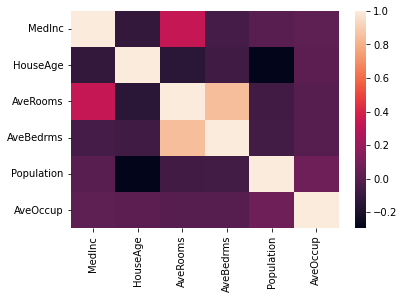

In [193]:
sns.heatmap(X.corr())

In [194]:
# Detecting multicollineality through the VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,feature,VIF
0,MedInc,7.766787
1,HouseAge,4.309941
2,AveRooms,41.111592
3,AveBedrms,34.118257
4,Population,2.322315
5,AveOccup,1.094793


In [195]:
scaler = StandardScaler()

In [196]:
X =  pd.DataFrame(scaler.fit_transform(X), columns=X.columns )

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

## Ridge Regression - L2 regularization

The loss function is given by:
$$J(\theta) = \sum_{i=1}^m (\hat{y}_i - y_i)^2  + \lambda \sum_j^p \theta_j^2$$

### Using grid search

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
ridge_r =Ridge()

In [62]:
parameters = {'alpha': [20,15,10, 0.001, 0.01, 0.1, 0.5, 0.9, 1], 'fit_intercept':[False, True]}

In [63]:
clf=GridSearchCV(ridge_r, parameters)

In [64]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [20, 15, 10, 0.001, 0.01, 0.1, 0.5, 0.9, 1],
                         'fit_intercept': [False, True]})

In [65]:
clf.best_params_

{'alpha': 20, 'fit_intercept': True}

In [66]:
ridge_r =Ridge(alpha=10, fit_intercept=True)
ridge_r.fit(X_train, y_train)

Ridge(alpha=10)

In [67]:
y_pred = ridge_r.predict(X_test)

In [68]:
ridge_r.coef_

array([ 1.01670983,  0.20605571, -0.51138266,  0.45214019,  0.02571464,
       -0.04589416])

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import jarque_bera

In [70]:
r2_score(y_test, y_pred)

0.542532008547304

In [71]:
y_pred

array([2.24322344, 1.66943164, 1.94055403, ..., 2.09902199, 2.6252577 ,
       2.35234192])

In [72]:
y_test

19121    1.516
20019    0.992
15104    1.345
3720     2.317
8938     4.629
         ...  
5462     2.850
1859     1.224
10867    1.167
4693     4.869
3521     2.362
Name: MedHouseVal, Length: 6192, dtype: float64

In [73]:
ridge_r.score(X_test, y_test)

0.542532008547304

In [74]:
mean_squared_error(y_test, y_pred)

0.6049271050849797

In [75]:
mean_absolute_error(y_test,y_pred)

0.5719040699635674

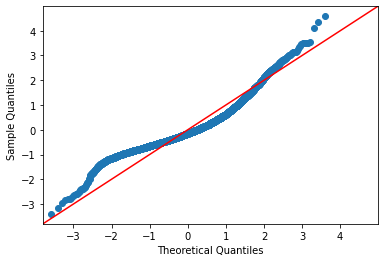

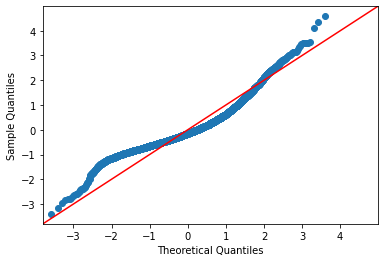

In [76]:
sm.qqplot((y_test - y_pred), line="45")

In [77]:
jarque_bera((y_test-y_pred))

Jarque_beraResult(statistic=3273.7409880540536, pvalue=0.0)

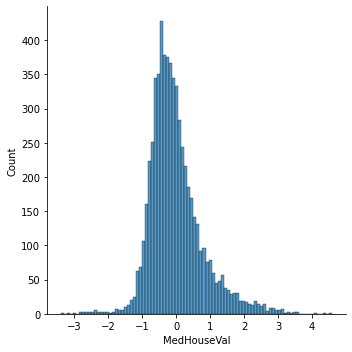

In [78]:
sns.displot((y_test-y_pred))

## Lasso regression - L1 regularization

The loss function is given by:
$$J(\theta) = \sum_{i=1}^m (\hat{y}_i - y_i)^2  + \lambda \sum_j^p |\theta_j|$$

In [151]:
lasso = Lasso()

In [152]:
parameters = {'alpha': [10, 0.001, 0.01, 0.1, 0.5, 0.9, 1], 'fit_intercept':[True, False]}

In [153]:
clf=GridSearchCV(lasso, parameters)

In [154]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [10, 0.001, 0.01, 0.1, 0.5, 0.9, 1],
                         'fit_intercept': [True, False]})

In [155]:
clf.best_params_

{'alpha': 0.01, 'fit_intercept': True}

In [156]:
lasso = Lasso(alpha=0.01, fit_intercept=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [157]:
y_pred = lasso.predict(X_test)

In [158]:
lasso.coef_

array([ 0.94626154,  0.1961314 , -0.35673975,  0.30882388,  0.01378631,
       -0.03521285])

In [159]:
r2_score(y_test, y_pred)

0.5384038443732608

In [163]:
mean_squared_error(y_test, y_pred)

0.610385931603507

In [164]:
mean_absolute_error(y_test, y_pred)

0.578573402946714

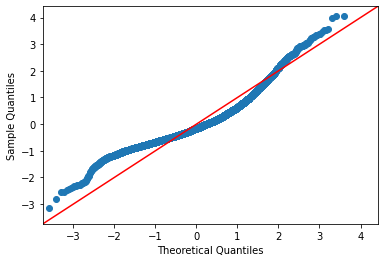

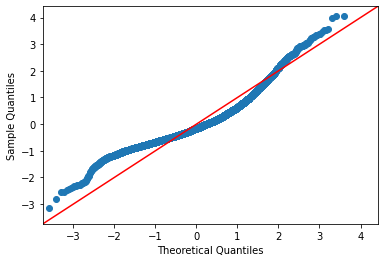

In [161]:
sm.qqplot((y_test - y_pred), line="45")

In [143]:
jarque_bera((y_test-y_pred))

Jarque_beraResult(statistic=2874.0095192352032, pvalue=0.0)

In [128]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
12364,0.042178,-1.798890,0.179534,0.030462,1.399218,0.054364
12271,-0.181690,-0.607019,0.107344,-0.100051,0.660986,-0.037870
19605,-0.998997,0.267020,0.015847,0.100936,-0.707747,0.051636
10600,1.601573,-1.639974,0.221280,-0.148142,-0.497580,-0.051547
45,-0.628427,1.856182,-0.442147,0.005911,-0.624740,-0.114683
...,...,...,...,...,...,...
7763,-0.121999,0.584852,0.062898,0.039480,-0.826076,0.067263
15377,0.351846,-1.163225,0.237535,-0.166076,0.892346,0.005433
17730,0.926388,-1.878348,0.213973,-0.137395,0.891463,0.040718
15725,0.002279,1.220517,-0.278781,-0.152216,-0.763379,-0.129966


## Linear Regression

In [144]:
lr = LinearRegression()

In [145]:
lr.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pred = lr.predict(X_test)

In [147]:
r2_score(y_test, y_pred)

0.5425656320013884

In [148]:
mean_squared_error(y_test, y_pred)

0.6048826435289314

In [149]:
y_test.shape

(6192,)

In [150]:
y_train.shape

(14448,)

In [162]:
y_test

19121    1.516
20019    0.992
15104    1.345
3720     2.317
8938     4.629
         ...  
5462     2.850
1859     1.224
10867    1.167
4693     4.869
3521     2.362
Name: MedHouseVal, Length: 6192, dtype: float64